In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Load mpg dataset
df = sns.load_dataset("mpg")


In [27]:

print(df.info())


print(df.head())

print(df.describe())

print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17

In [28]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [29]:
#Top Counteries with high mpg, fuel economy

df.groupby('origin')['mpg'].max()

origin
europe    44.3
japan     46.6
usa       39.0
Name: mpg, dtype: float64

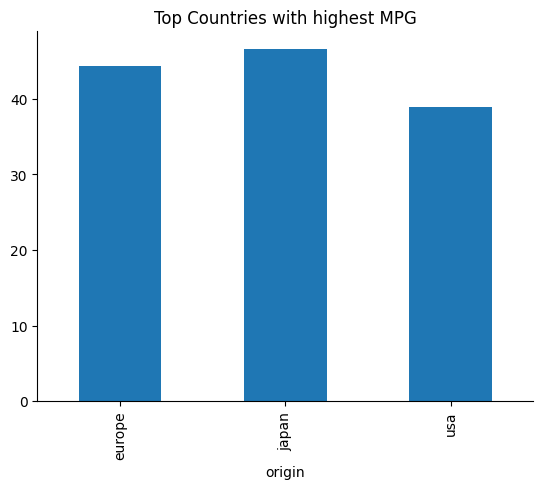

In [30]:
topCountiresHighMpg = df.groupby('origin')['mpg'].max()

topCountiresHighMpgPlot = topCountiresHighMpg.plot(x = "Origin",
             y = "Mpg",
             title = "Top Countries with highest MPG",
             kind = "bar"); #use semicolon to supress text info, which is written out by dunder __repr__ method

topCountiresHighMpgPlot.spines["top"].set_visible(False)
topCountiresHighMpgPlot.spines["right"].set_visible(False)
topCountiresHighMpgPlot.legend().set_visible(False)

In [31]:
print(f"{df.shape[0]} samples")
print(f"{df.shape[1]} featurs")


398 samples
9 featurs


In [32]:
X, y = df.drop("mpg", axis="columns"), df["mpg"]
X

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [33]:
type(y),type(X)

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [34]:
## Scikit-learn steps
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
3,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
18,4,97.0,88.0,2130,14.5,70,japan,datsun pl510
376,4,91.0,68.0,2025,18.2,82,japan,mazda glc custom l
248,4,91.0,60.0,1800,16.4,78,japan,honda civic cvcc
177,4,115.0,95.0,2694,15.0,75,europe,audi 100ls
...,...,...,...,...,...,...,...,...
71,3,70.0,97.0,2330,13.5,72,japan,mazda rx2 coupe
106,8,350.0,180.0,4499,12.5,73,usa,oldsmobile vista cruiser
270,4,134.0,95.0,2515,14.8,78,japan,toyota celica gt liftback
348,4,89.0,62.0,2050,17.3,81,japan,toyota tercel


In [35]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.2, random_state=42
   )

print(f"{X_train.shape=}")
print(f"{y_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_test.shape=}")



X_train.shape=(318, 8)
y_train.shape=(318,)
X_test.shape=(80, 8)
y_test.shape=(80,)


In [36]:
##2.Feature scaling

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [37]:
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

print(f"{scaled_X_train.min() = }")
print(f"{scaled_X_train.max() = }")
print(f"{scaled_X_test.min() = }")
print(f"{scaled_X_test.max() = }")

ValueError: could not convert string to float: 'usa'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


df = sns.load_dataset("mpg")


df = df.dropna().drop(columns=["name"])

origin_map = {"usa": 1, "europe": 2, "japan": 3}
df["origin"] = df["origin"].map(origin_map)

X = df.drop(columns=["mpg"])
y = df["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Shapes:")
print("X_train:", X_train.shape, "X_test:", X_test.shape)
print("y_train:", y_train.shape, "y_test:", y_test.shape)

def evaluate_regression(X_train, X_test, y_train, y_test, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")

    return model, y_pred
linreg = LinearRegression()
model, preds = evaluate_regression(X_train, X_test, y_train, y_test, linreg)

coef_table = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

print("\nFeature importance (coefficients):")
print(coef_table)


Shapes:
X_train: (313, 7) X_test: (79, 7)
y_train: (313,) y_test: (79,)
MAE: 2.42
MSE: 10.71
RMSE: 3.27

Feature importance (coefficients):
        Feature  Coefficient
6        origin     1.613457
5    model_year     0.767743
4  acceleration     0.037950
1  displacement     0.015109
3        weight    -0.006142
2    horsepower    -0.021302
0     cylinders    -0.345789


In [ ]:
intercept = model.intercept_          
coeffs = pd.Series(model.coef_, index=X.columns)

print("Intercept:", intercept)
print("Coefficients:\n", coeffs)

sample = {
    "cylinders": 4,
    "displacement": 120,
    "horsepower": 90,
    "weight": 2500,
    "acceleration": 15,
    "model_year": 76,
    "origin": 2
}
mpg_pred = intercept
for feature, value in sample.items():
    mpg_pred += coeffs[feature] * value

print("Predicted MPG (manual equation):", mpg_pred)

import pandas as pd
mpg_model = model.predict(pd.DataFrame([sample]))[0]
print("Predicted MPG (model.predict):", mpg_model)


Intercept: -18.499361128724747
Coefficients:
 cylinders      -0.345789
displacement    0.015109
horsepower     -0.021302
weight         -0.006142
acceleration    0.037950
model_year      0.767743
origin          1.613457
dtype: float64
Predicted MPG (manual equation): 26.803908762672734
Predicted MPG (model.predict): 26.80390876267273
